In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math
from collections import Counter

In [ ]:
def mahattan_distance(point1, point2):
    return sum(abs(e1-e2) for e1, e2 in zip(point1,point2))

def euclidean_distance(point1, point2):
    return math.sqrt(sum((e1-e2)**2 for e1, e2 in zip(point1,point2)))

In [ ]:
def knn(data, query, k, distance_fn):
    neighbor_distances_and_indices = []

    # 1. Calculate the distance between the query example and the current example from the data.
    for index, example in enumerate(data):
        distance = distance_fn(example[:-1], query)

        # 2. Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))

    # 3. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)

    # 4. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]

    # 5. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    return Counter(k_nearest_labels).most_common(1)[0][0]

In [ ]:
def accuracy_score(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    correct_predictions = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
####### Bài 1 #########
data_train = [[0.376000,0.488000,0],
            [0.312000,0.544000,0],
            [0.298000,0.624000,0],
            [0.394000,0.600000,0],
            [0.506000,0.512000,0],
            [0.488000,0.334000,1],
            [0.478000,0.398000,1],
            [0.606000,0.366000,1],
            [0.428000,0.294000,1],
            [0.542000,0.252000,1]]

data_test = [[0.550000,	0.364000],
            [0.558000, 	0.470000],
            [0.456000, 	0.450000 ],
            [0.450000, 	0.570000 ]]
print("1NN")
for i in data_test:
  print(i, knn(data_train, i, k = 1, distance_fn = mahattan_distance))

print("3NN")
for i in data_test:
  print(i, knn(data_train, i, k = 3, distance_fn = mahattan_distance))

1NN
[0.55, 0.364] 1
[0.558, 0.47] 0
[0.456, 0.45] 1
[0.45, 0.57] 0
3NN
[0.55, 0.364] 1
[0.558, 0.47] 1
[0.456, 0.45] 0
[0.45, 0.57] 0


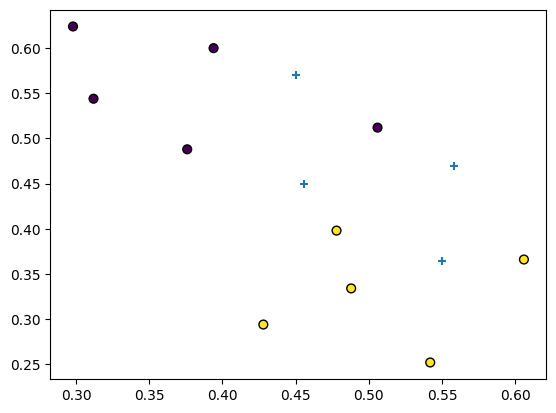

In [ ]:
A = np.array(data_train)
B = np.array(data_test)
plt.scatter(A[:,0], A[:,1], c = A[:,2], marker="o", s=40, edgecolor="k")
plt.scatter(B[:,0], B[:,1], marker="+")
plt.show()

In [ ]:
#### Bài 2 #######
!wget http://www.cit.ctu.edu.vn/~dtnghi/ml/data.tar.gz --no-check-certificate
!tar -xvf data.tar.gz

--2024-01-14 15:19:14--  http://www.cit.ctu.edu.vn/~dtnghi/ml/data.tar.gz
Resolving www.cit.ctu.edu.vn (www.cit.ctu.edu.vn)... 123.30.143.202
Connecting to www.cit.ctu.edu.vn (www.cit.ctu.edu.vn)|123.30.143.202|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.cit.ctu.edu.vn/~dtnghi/ml/data.tar.gz [following]
--2024-01-14 15:19:14--  https://www.cit.ctu.edu.vn/~dtnghi/ml/data.tar.gz
Connecting to www.cit.ctu.edu.vn (www.cit.ctu.edu.vn)|123.30.143.202|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 31746068 (30M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  30.28M  6.70MB/s    in 4.5s    

2024-01-14 15:19:20 (6.70 MB/s) - ‘data.tar.gz’ saved [31746068/31746068]

data/
data/optics/
data/optics/opt.tst
data/optics/opt.trn
data/optics/des.txt
data/faces/
data/faces/data.tst
data/faces/data.trn
data/faces/des.txt


In [ ]:
def knn_classifier_manual(train_name, test_name, k):
    # Load datasets
    with open(train_name) as f:
      train = np.loadtxt(f, delimiter=',')
    with open(test_name) as f:
      test = np.loadtxt(f, delimiter=',')

    # Split datasets into features and labels
    X_train = train
    X_test, y_test = test[:,: -1], test[:,-1]

    #Predict
    predict = []
    for i in X_test:
      predict.append(knn(X_train, i, k, distance_fn = euclidean_distance))
    return accuracy_score(y_test, predict)

In [ ]:
DIR = './data/iris/'
#Datasets: iris, optics, letter, face, fp

In [ ]:
print('accuracy_score - iris: {}'.format(knn_classifier_manual(DIR + '/iris.trn', DIR + '/iris.tst', 1)))

accuracy_score - iris: 0.94


In [ ]:
##### Bài vân tay dùng kNN

In [ ]:
!wget https://www.cit.ctu.edu.vn/~dtnghi/fp107.zip --no-check-certificate
!unzip /content/fp107.zip

--2024-01-14 15:19:52--  https://www.cit.ctu.edu.vn/~dtnghi/fp107.zip
Resolving www.cit.ctu.edu.vn (www.cit.ctu.edu.vn)... 123.30.143.202
Connecting to www.cit.ctu.edu.vn (www.cit.ctu.edu.vn)|123.30.143.202|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 18401456 (18M) [application/zip]
Saving to: ‘fp107.zip’

fp107.zip           100%[===================>]  17.55M  5.94MB/s    in 3.0s    

2024-01-14 15:19:56 (5.94 MB/s) - ‘fp107.zip’ saved [18401456/18401456]

Archive:  /content/fp107.zip
   creating: fp107/
  inflating: fp107/des.txt           
  inflating: fp107/fp107.trn         
  inflating: fp107/fp107.tst         


In [ ]:
def knn_classifier_fingerprint(train_name, test_name, k):
    # Load datasets
    with open(train_name) as f:
      train = np.loadtxt(f, delimiter=' ')
    with open(test_name) as f:
      test = np.loadtxt(f, delimiter=' ')

    # Split datasets into features and labels
    X_train = train
    X_test, y_test = test[:,: -1], test[:,-1]

    #Predict
    predict = []
    for i in X_test:
      predict.append(knn(X_train, i, k, distance_fn = euclidean_distance))
    return accuracy_score(y_test, predict)


In [ ]:
DIR = '/content/fp107/'

In [ ]:
knn_classifier_fingerprint(DIR + 'fp107.trn', DIR + 'fp107.tst', 1)

0.9812734082397003

In [ ]:
#Sử dụng thư viện sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn_classifier(train_name, test_name, k):
    # Load datasets
    with open(train_name) as f:
      train = np.loadtxt(f, delimiter=',')
    with open(test_name) as f:
      test = np.loadtxt(f, delimiter=',')

    # Split datasets into features and labels
    X_train, y_train = train[:,:-1], train[:,-1]
    X_test, y_test = test[:,: -1], test[:,-1]

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k,  p=2, metric='minkowski')

    # Train the classifier
    knn.fit(X_train, y_train)

    # Test the classifier
    predictions = knn.predict(X_test)

    # Calc accuracy
    acc = accuracy_score(y_test, predictions)
    return acc